## Splitting Given data into train and test folders

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd 
import numpy as np 
import os  
import random 
from shutil import copyfile 


In [2]:
import os 
os.chdir(r'E:\AI-ML PYTHON\job datasets\Blood Glucose') 

In [3]:
os.getcwd()

In [4]:
Blood_glucose = r'E:\AI-ML PYTHON\job datasets\Blood Glucose\data'

In [5]:
train_path = 'train'  # create train and test folders in the current directory
test_path = 'test'
        
all_data = os.listdir(Blood_glucose)
all_data = [f for f in all_data if not f.startswith('.')]
random.shuffle(all_data) # shuffling the given data to insert into train and test folders.
n=70
limit = int(n*0.8)  # 80% data for training and 20% for testing

train_data = all_data[:limit]
test_data = all_data[limit:]

for j in range(len(train_data)):
    original_path = os.path.join(Blood_glucose, train_data[j])
    new_path = os.path.join(train_path, train_data[j])
    copyfile(original_path, new_path)
    
for k in range(len(test_data)):
    original_path = os.path.join(Blood_glucose, test_data[k])
    new_path = os.path.join(test_path, test_data[k])
    copyfile(original_path, new_path)

## Considering training data


In [6]:
os.chdir(r'E:\AI-ML PYTHON\job datasets\Blood Glucose\train')


In [7]:
os.getcwd()

'E:\\AI-ML PYTHON\\job datasets\\Blood Glucose\\train'

In [8]:
from glob import glob


In [9]:
files = glob('data*')

In [10]:
files.sort()
files 

['data-01.csv',
 'data-02.csv',
 'data-03.csv',
 'data-04.csv',
 'data-05.csv',
 'data-06.csv',
 'data-07.csv',
 'data-11.csv',
 'data-12.csv',
 'data-13.csv',
 'data-14.csv',
 'data-16.csv',
 'data-17.csv',
 'data-18.csv',
 'data-19.csv',
 'data-20.csv',
 'data-21.csv',
 'data-22.csv',
 'data-23.csv',
 'data-24.csv',
 'data-25.csv',
 'data-26.csv',
 'data-27.csv',
 'data-28.csv',
 'data-29.csv',
 'data-30.csv',
 'data-31.csv',
 'data-33.csv',
 'data-34.csv',
 'data-36.csv',
 'data-37.csv',
 'data-39.csv',
 'data-40.csv',
 'data-41.csv',
 'data-42.csv',
 'data-43.csv',
 'data-44.csv',
 'data-45.csv',
 'data-46.csv',
 'data-47.csv',
 'data-48.csv',
 'data-49.csv',
 'data-51.csv',
 'data-54.csv',
 'data-55.csv',
 'data-56.csv',
 'data-57.csv',
 'data-58.csv',
 'data-59.csv',
 'data-61.csv',
 'data-62.csv',
 'data-63.csv',
 'data-65.csv',
 'data-66.csv',
 'data-69.csv',
 'data-70.csv']

In [11]:
# merging all datas given individual that are in trained folder which already shuffled.
data = pd.concat( (pd.read_csv(file,sep='\t',parse_dates=True, header=None) for file in files), ignore_index=True)
data.head()

,0,1,2,3
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [12]:
data.shape 

(24700, 4)

In [13]:
data.columns = ['Date','Time','Code','Value']

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Code,24700.0,45.897126,13.384726,0.0,33.0,35.0,60.0,72.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24700 entries, 0 to 24699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    24667 non-null  object
 1   Time    24700 non-null  object
 2   Code    24700 non-null  int64 
 3   Value   24667 non-null  object
dtypes: int64(1), object(3)
memory usage: 772.0+ KB


In [16]:
data.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [17]:
data.tail() 

,Date,Time,Code,Value
24695,05-09-1989,08:00,33,1
24696,05-09-1989,08:00,34,7
24697,05-10-1989,08:00,34,7
24698,05-11-1989,08:00,34,7
24699,05-12-1989,08:00,34,7


## cleaning the data

In [18]:
import datetime as dt

In [19]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M',errors='coerce')

In [20]:
data['year'] = data['Date'].dt.year
data['month']=data['Date'].dt.month 
data['day']=data['Date'].dt.day

data['Hour'] = data['Time'].dt.hour 
data['minute'] = data['Time'].dt.minute 

data['weekday'] = data['Date'].dt.weekday
data['dayname'] = data['Date'].dt.day_name ()


In [21]:
data.head(5) 

,Date,Time,Code,Value,year,month,day,Hour,minute,weekday,dayname
0,1991-04-21,1900-01-01 09:09:00,58,100,1991.0,4.0,21.0,9.0,9.0,6.0,Sunday
1,1991-04-21,1900-01-01 09:09:00,33,9,1991.0,4.0,21.0,9.0,9.0,6.0,Sunday
2,1991-04-21,1900-01-01 09:09:00,34,13,1991.0,4.0,21.0,9.0,9.0,6.0,Sunday
3,1991-04-21,1900-01-01 17:08:00,62,119,1991.0,4.0,21.0,17.0,8.0,6.0,Sunday
4,1991-04-21,1900-01-01 17:08:00,33,7,1991.0,4.0,21.0,17.0,8.0,6.0,Sunday


In [22]:
data.tail(5) 

,Date,Time,Code,Value,year,month,day,Hour,minute,weekday,dayname
24695,1989-05-09,1900-01-01 08:00:00,33,1,1989.0,5.0,9.0,8.0,0.0,1.0,Tuesday
24696,1989-05-09,1900-01-01 08:00:00,34,7,1989.0,5.0,9.0,8.0,0.0,1.0,Tuesday
24697,1989-05-10,1900-01-01 08:00:00,34,7,1989.0,5.0,10.0,8.0,0.0,2.0,Wednesday
24698,1989-05-11,1900-01-01 08:00:00,34,7,1989.0,5.0,11.0,8.0,0.0,3.0,Thursday
24699,1989-05-12,1900-01-01 08:00:00,34,7,1989.0,5.0,12.0,8.0,0.0,4.0,Friday


## Categorical encoding of Code column

In [23]:
data['Code'].nunique() 

24

In [24]:
data['Code'].unique()

array([58, 33, 34, 62, 48, 65, 60, 35, 56, 64, 61, 67, 63, 57, 72, 66, 69,
       70, 71, 59, 68,  4, 36,  0], dtype=int64)

In [25]:
pd.get_dummies(data['Code'], drop_first=True).shape

(24700, 23)

## One hot encoding with multiple categorical features 

In [26]:
print(data['Code'].value_counts().sort_values(ascending=False).head(24))

33    8458
34    3103
58    2835
62    2551
60    2256
48    1657
35     976
57     842
64     642
65     254
67     248
63     203
66     148
70      97
56      97
72      81
71      75
69      54
61      52
0       33
68      21
59      15
4        1
36       1
Name: Code, dtype: int64


  - Picking Top 15 most frequent categories

In [27]:
top_15 = [x for x in data['Code'].value_counts().sort_values(ascending=False).head(15).index]
top_15

[33, 34, 58, 62, 60, 48, 35, 57, 64, 65, 67, 63, 66, 70, 56]

In [28]:
# now we make the top 15 binary variables
for label in top_15:
    data[label] = np.where(data['Code']==label,1,0)
    
    
data[['Code']+top_15].head(10)

,Code,33,34,58,62,60,48,35,57,64,65,67,63,66,70,56
0,58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,62,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Handling missing values in data

In [29]:
data.isna().sum()

Date       40
Time       33
Code        0
Value      33
year       40
month      40
day        40
Hour       33
minute     33
weekday    40
dayname    40
33          0
34          0
58          0
62          0
60          0
48          0
35          0
57          0
64          0
65          0
67          0
63          0
66          0
70          0
56          0
dtype: int64

In [30]:
## we have a huge data, so we can drop null values which are negligible
data.dropna(inplace=True)

In [31]:
data.shape  

(24627, 26)

In [32]:
data.isna().sum()

Date       0
Time       0
Code       0
Value      0
year       0
month      0
day        0
Hour       0
minute     0
weekday    0
dayname    0
33         0
34         0
58         0
62         0
60         0
48         0
35         0
57         0
64         0
65         0
67         0
63         0
66         0
70         0
56         0
dtype: int64

 - we have droped all null values from the data 

In [33]:
data.dtypes 

Date       datetime64[ns]
Time       datetime64[ns]
Code                int64
Value              object
year              float64
month             float64
day               float64
Hour              float64
minute            float64
weekday           float64
dayname            object
33                  int32
34                  int32
58                  int32
62                  int32
60                  int32
48                  int32
35                  int32
57                  int32
64                  int32
65                  int32
67                  int32
63                  int32
66                  int32
70                  int32
56                  int32
dtype: object

In [34]:
data['dayname'] = data['dayname'].astype('category')

In [35]:
data['Value'] = pd.to_numeric(data['Value'], errors='coerce').convert_dtypes() 


In [36]:
data.dtypes 

Date       datetime64[ns]
Time       datetime64[ns]
Code                int64
Value             float64
year              float64
month             float64
day               float64
Hour              float64
minute            float64
weekday           float64
dayname          category
33                  int32
34                  int32
58                  int32
62                  int32
60                  int32
48                  int32
35                  int32
57                  int32
64                  int32
65                  int32
67                  int32
63                  int32
66                  int32
70                  int32
56                  int32
dtype: object

In [37]:
data.drop(columns='dayname', inplace=True)

In [38]:
from scipy import stats

In [39]:
# Slicing the data with numeric dtype  columns
data1 = data.iloc[:,2:]

In [40]:
data1.head(5) 

,Code,Value,year,month,day,Hour,minute,weekday,33,34,...,48,35,57,64,65,67,63,66,70,56
0,58,100.0,1991.0,4.0,21.0,9.0,9.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,9.0,1991.0,4.0,21.0,9.0,9.0,6.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,34,13.0,1991.0,4.0,21.0,9.0,9.0,6.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62,119.0,1991.0,4.0,21.0,17.0,8.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,7.0,1991.0,4.0,21.0,17.0,8.0,6.0,1,0,...,0,0,0,0,0,0,0,0,0,0


## outliers detection

<AxesSubplot:xlabel='Value'>

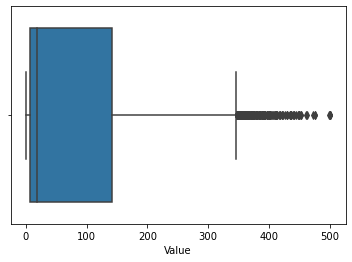

In [41]:
import seaborn as sns
sns.boxplot(data=data1,x = data1['Value'])


<AxesSubplot:xlabel='year'>

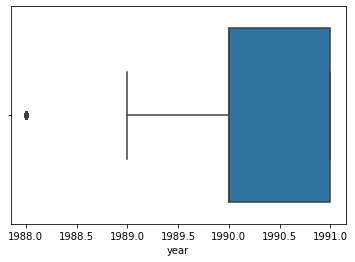

In [42]:
import seaborn as sns
sns.boxplot(data=data1,x = data1['year']) 


<AxesSubplot:>

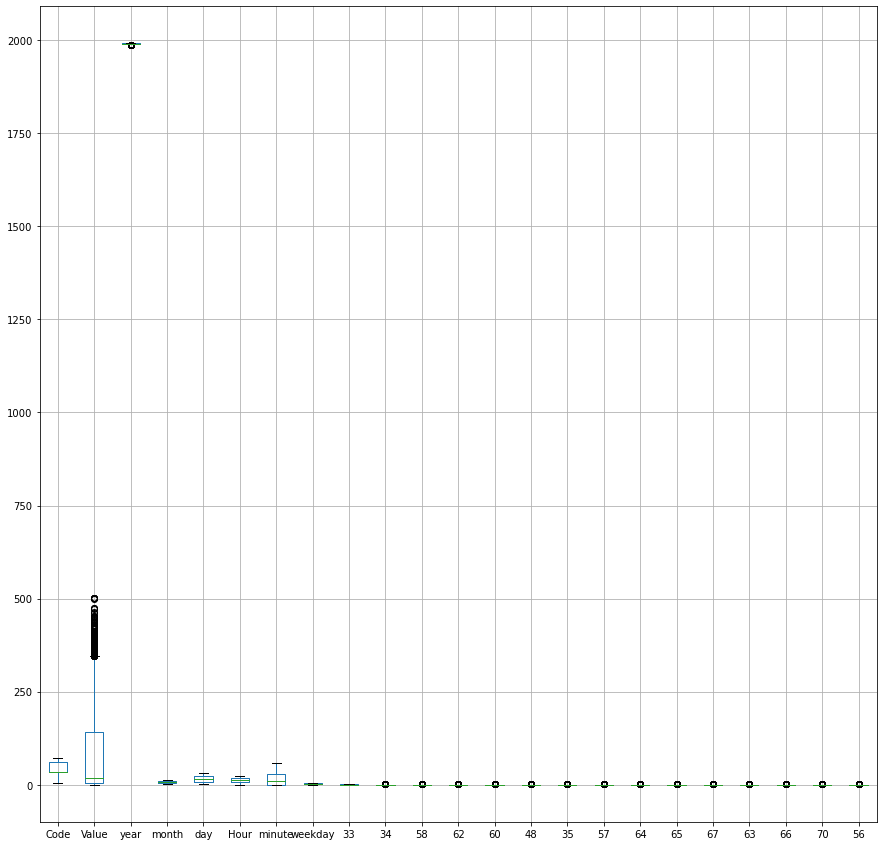

In [43]:
data1.boxplot(figsize=(15,15))

 - Note:
  - There are outliers in the Value as if we see in the above boxplot
  - I am not going to remove the outliers because i feel this ouliers are necessary in this case study due to sudden insulin spike or down behavior.
  - however, i am not so much expert of medical domain  but no worries i am going to take ml algorithms which are non-sensitive to oultiers.

## EDA with Data visualization

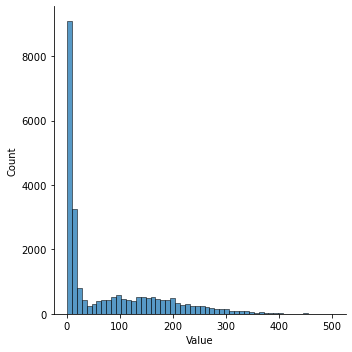

In [44]:
sns.displot(data1['Value'])

<AxesSubplot:ylabel='Density'>

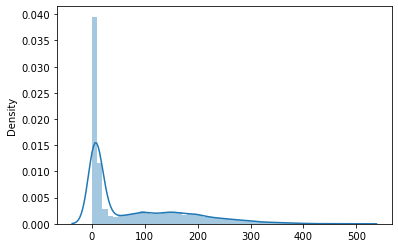

In [45]:
sns.distplot(data1,x=data1['Value'], kde=True)

 - if you observe the distribution plot of values clearly, it's a  Positively skewed distribution

array([[<AxesSubplot:title={'center':'Code'}>,
        <AxesSubplot:title={'center':'Value'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'minute'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'33'}>,
        <AxesSubplot:title={'center':'34'}>],
       [<AxesSubplot:title={'center':'58'}>,
        <AxesSubplot:title={'center':'62'}>,
        <AxesSubplot:title={'center':'60'}>,
        <AxesSubplot:title={'center':'48'}>,
        <AxesSubplot:title={'center':'35'}>],
       [<AxesSubplot:title={'center':'57'}>,
        <AxesSubplot:title={'center':'64'}>,
        <AxesSubplot:title={'center':'65'}>,
        <AxesSubplot:title={'center':'67'}>,
        <AxesSubplot:title={'center':'63'}>],
       [<AxesSubplot:title={'center':'66'}>,
        <AxesSubplot:title={'

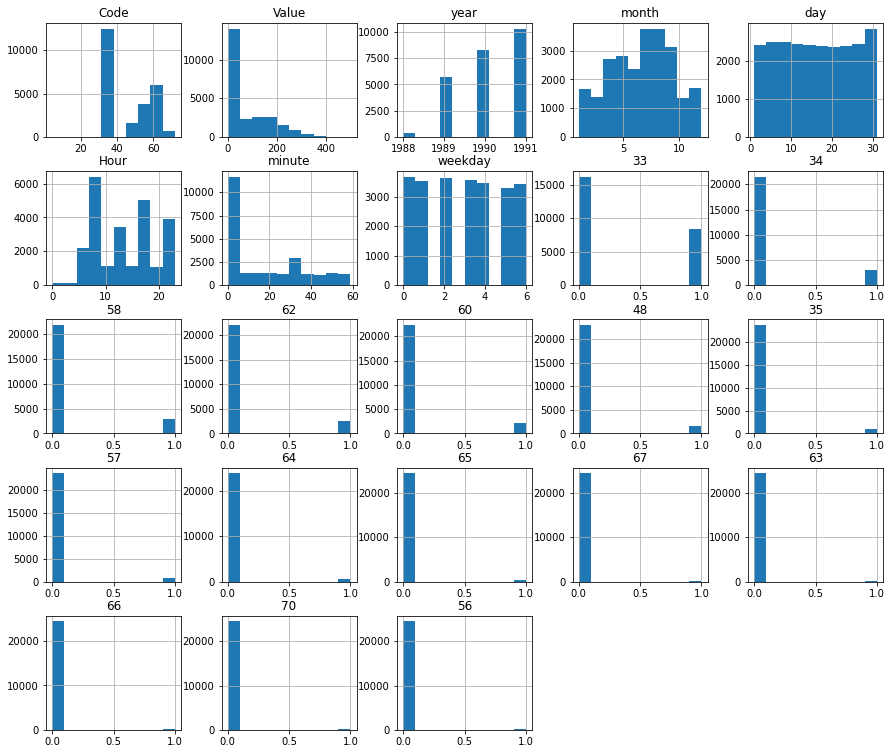

In [46]:
data1.hist(figsize=(15,13))


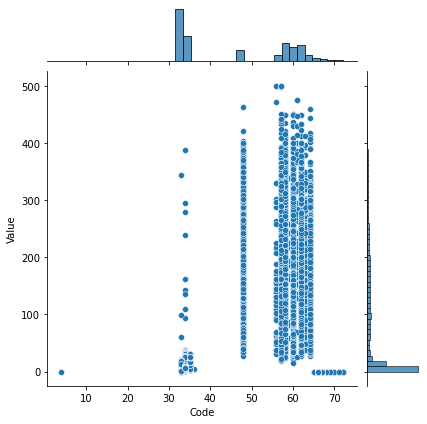

In [47]:
# The effect of codes on the values with visualization
sns.jointplot(data1['Code'],data1['Value'])


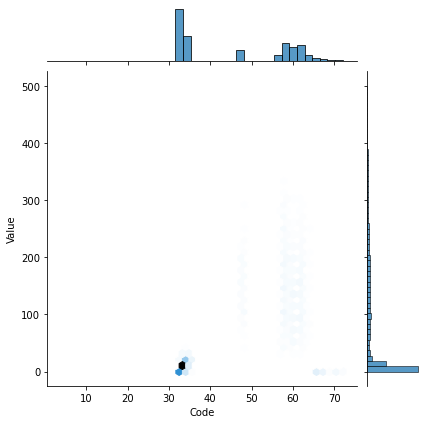

In [48]:
sns.jointplot(data1['Code'],data1['Value'],kind='hex')


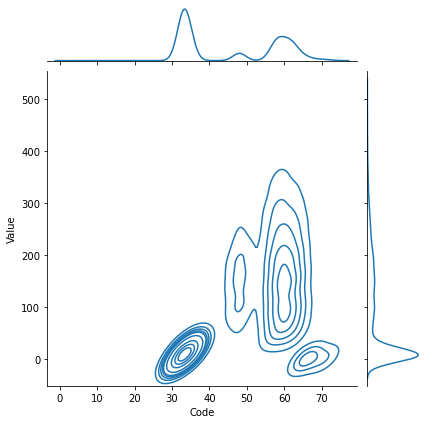

In [49]:
sns.jointplot(data1['Code'],data1['Value'],kind='kde')


 - If you observe the above plot, it clears represents the all the categorical codes effects on the values with kernel density estimation

<AxesSubplot:xlabel='Code', ylabel='Value'>

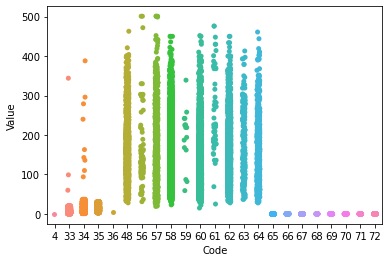

In [50]:
sns.stripplot(data1['Code'],data1['Value'])


<AxesSubplot:xlabel='Code', ylabel='Value'>

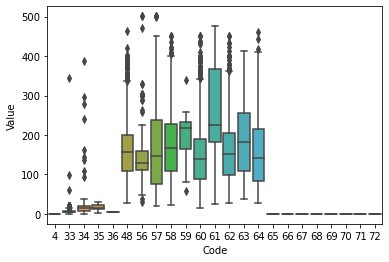

In [51]:
sns.boxplot(data1['Code'],data1['Value'])


 - All the categorical codes values representing in the boxplot for the data distributions

<AxesSubplot:xlabel='Code', ylabel='count'>

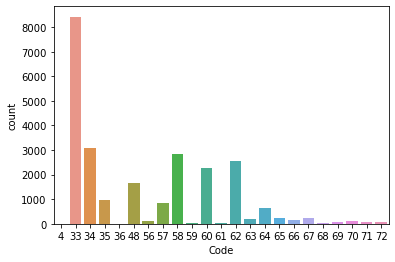

In [52]:
sns.countplot(data1['Code'])


<AxesSubplot:xlabel='Code', ylabel='Value'>

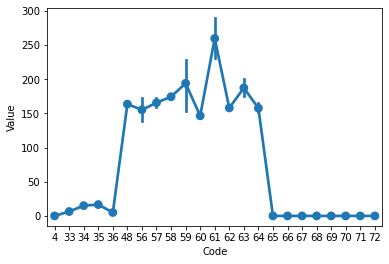

In [53]:
sns.pointplot(data1['Code'],data1['Value'])

 - The categorical codes representing in the countplot as each code frequency in the data 

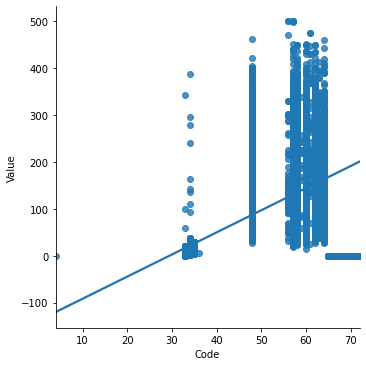

In [54]:
sns.lmplot(x='Code',y='Value',data=data1)


## Correlation of the data

In [55]:
data1.corr()

,Code,Value,year,month,day,Hour,minute,weekday,33,34,...,48,35,57,64,65,67,63,66,70,56
Code,1.000000,0.670302,-0.025686,0.034927,0.000115,0.090119,0.061505,-0.008575,-0.703997,-0.342144,...,0.040905,-0.167800,0.156089,0.221913,0.146150,0.159576,0.116798,0.117171,0.113689,0.047436
Value,0.670302,1.000000,-0.051777,0.003587,0.007987,0.093534,-0.017408,0.027300,-0.552456,-0.255918,...,0.244945,-0.133682,0.175651,0.138912,-0.085233,-0.084210,0.106298,-0.064920,-0.052503,0.051755
year,-0.025686,-0.051777,1.000000,-0.302847,-0.013495,0.012646,0.162640,0.009966,0.016756,0.051025,...,-0.078110,-0.011504,0.018441,0.050422,0.028140,0.004384,0.027125,-0.066182,0.003693,-0.004135
month,0.034927,0.003587,-0.302847,1.000000,-0.030038,0.013954,0.119171,0.005881,-0.013735,0.001761,...,-0.032639,-0.023940,0.032939,0.037926,0.016465,0.013836,0.022587,0.069134,0.018219,0.018465
day,0.000115,0.007987,-0.013495,-0.030038,1.000000,0.002702,0.013937,0.020315,-0.000618,-0.010562,...,-0.003048,0.019236,0.003600,0.003795,-0.004383,-0.002906,0.005470,-0.021314,0.011260,0.001504
Hour,0.090119,0.093534,0.012646,0.013954,0.002702,1.000000,-0.037430,0.011695,-0.040626,-0.072344,...,0.393853,-0.134749,0.001436,0.204232,-0.028367,-0.004607,0.103535,-0.007046,0.040535,0.008907
minute,0.061505,-0.017408,0.162640,0.119171,0.013937,-0.037430,1.000000,-0.009169,-0.056711,0.035851,...,-0.121690,0.030105,0.103205,0.100770,0.045622,0.058696,0.069875,0.007645,0.041201,0.033695
weekday,-0.008575,0.027300,0.009966,0.005881,0.020315,0.011695,-0.009169,1.000000,0.006541,-0.001199,...,0.002355,0.001627,0.006738,-0.009019,-0.022131,-0.005774,0.006551,-0.005486,0.001729,-0.001191
33,-0.703997,-0.552456,0.016756,-0.013735,-0.000618,-0.040626,-0.056711,0.006541,1.000000,-0.273673,...,-0.193626,-0.146448,-0.135640,-0.117945,-0.073595,-0.072711,-0.065724,-0.056055,-0.045334,-0.045334
34,-0.342144,-0.255918,0.051025,0.001761,-0.010562,-0.072344,0.035851,-0.001199,-0.273673,1.000000,...,-0.101960,-0.077117,-0.071426,-0.062108,-0.038754,-0.038288,-0.034609,-0.029518,-0.023872,-0.023872


In [56]:
d1 = data1.drop(columns=['year','month','day','Hour','minute','weekday','Code'])

In [57]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})


<AxesSubplot:>

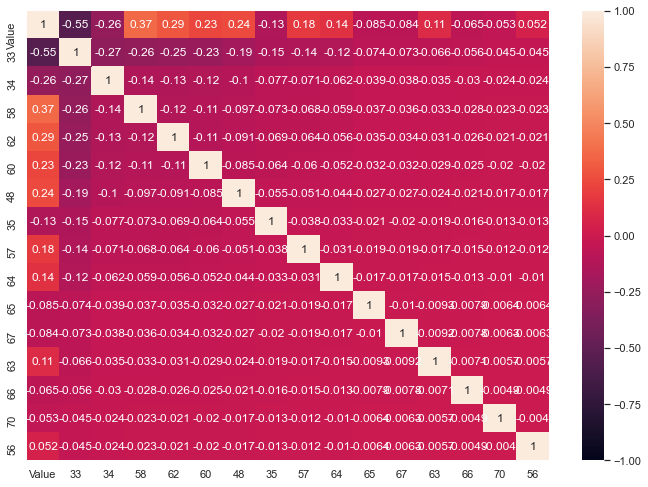

In [58]:
sns.heatmap(d1.corr(),annot=True,vmin=-1,vmax=+1)

 - I know the above plot is bit cumbersome to scrutinize the data and get into insight of it.
 - so i used a correlation defined function for manual checking.

In [59]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                
                

In [60]:
corr_features = correlation(d1, 0.3)
print(corr_features)

{33, 58}


In [61]:
corr_features1 = correlation(d1, 0.4)
print(corr_features1) 

{33}


In [62]:
corr_features2 = correlation(d1, 0.5)
print(corr_features2) 

{33}


In [63]:
corr_features3 = correlation(d1, 0.6)
print(corr_features3) 

set()


In [64]:
corr_features0 = correlation(d1, 0.2)
print(corr_features0)


{33, 34, 48, 58, 60, 62}


## 1) You are expected to explain – what factors are influencing the dependant variable – “value”?

- Ans: 33 - regular insulin dose is the factor influencing the 'Value' highly compared to other


## 2)explain the risk factors positively and negatively influencing the dependant variable – “value”?
 - Ans:
 
 - type 1: Factors Negatively effecting  the 'Values'
   - 33 - regular insulin dose
   - 34 - NPH insulin dose

 - type 2: Factors Positively effecting the 'Values'
   - 48 - Unspecified blood glucose measurement
   - 58 - Pre-breakfast blood glucose measurement
   - 60 - Pre-lunch blood glucose measurement
   - 62 - Pre-supper blood glucose measurement

In [65]:
data1.head()

,Code,Value,year,month,day,Hour,minute,weekday,33,34,...,48,35,57,64,65,67,63,66,70,56
0,58,100.0,1991.0,4.0,21.0,9.0,9.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,9.0,1991.0,4.0,21.0,9.0,9.0,6.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,34,13.0,1991.0,4.0,21.0,9.0,9.0,6.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62,119.0,1991.0,4.0,21.0,17.0,8.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,7.0,1991.0,4.0,21.0,17.0,8.0,6.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data1.dropna(inplace=True)

In [67]:
data1.isna().sum()

Code       0
Value      0
year       0
month      0
day        0
Hour       0
minute     0
weekday    0
33         0
34         0
58         0
62         0
60         0
48         0
35         0
57         0
64         0
65         0
67         0
63         0
66         0
70         0
56         0
dtype: int64

In [68]:
X = data1.drop(['Value','Code','year','month','day','Hour','minute','weekday'],axis=1)
X.head()

,33,34,58,62,60,48,35,57,64,65,67,63,66,70,56
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
y = data1['Value']
y.head()

0    100.0
1      9.0
2     13.0
3    119.0
4      7.0
Name: Value, dtype: float64

# train test split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [71]:
X_train.shape 

(17233, 15)

In [72]:
X_test.shape

(7386, 15)

In [73]:
y_train.shape 

(17233,)

In [74]:
y_test.shape 

(7386,)

### As i said before i am going to use ml models non-sensitive to outliers for the data
  - Models that are not going to use in our data because of sensitive to outliers.They are
  - 1- Linear Regression
  - 2- Logistic Regression
  - 3- Support Vector Machine
  - 4- K- Nearest Neighbors

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)


DecisionTreeRegressor()

In [76]:
y_pred0 = dtc.predict(X_test)

In [77]:
y_pred0

array([  6.48434061, 173.61468813,   6.48434061, ..., 159.79088319,
       163.48892675,   0.        ])

## Evaluating the data from test_folder which segregated in the begining only

In [78]:
test_data = pd.read_csv(r'E:\AI-ML PYTHON\job datasets\Blood Glucose\test\data-08.csv', sep='\t',header=None)
test_data.head()

,0,1,2,3
0,07-31-1990,12:09,60,100
1,07-31-1990,17:28,62,190
2,07-31-1990,18:41,62,124
3,08-01-1990,05:58,58,222
4,08-01-1990,12:57,60,339


In [79]:
test_data.columns = ['Date','Time','Code','Value']
test_data.head(3)

,Date,Time,Code,Value
0,07-31-1990,12:09,60,100
1,07-31-1990,17:28,62,190
2,07-31-1990,18:41,62,124


In [80]:
(test_data['Code'].value_counts().sort_values(ascending=False).head(24))

58    41
62    32
60    29
64    16
65    15
57     9
33     7
67     7
61     5
63     5
34     4
69     3
59     2
68     1
72     1
Name: Code, dtype: int64

In [81]:
top_15 = [x for x in test_data['Code'].value_counts().sort_values(ascending=False).head(15).index]
top_15

[58, 62, 60, 64, 65, 57, 33, 67, 61, 63, 34, 69, 59, 68, 72]

In [82]:
# now we make the top 15 binary variables
for label in top_15:
    test_data[label] = np.where(test_data['Code']==label,1,0)
    
    
test_data[['Code']+top_15].head(10)

,Code,58,62,60,64,65,57,33,67,61,63,34,69,59,68,72
0,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,68,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [87]:
test_data.isna().sum()

Date     0
Time     0
Code     0
Value    0
58       0
62       0
60       0
64       0
65       0
57       0
33       0
67       0
61       0
63       0
34       0
69       0
59       0
68       0
72       0
dtype: int64

In [86]:
test_data.dropna(axis=1,inplace=True)

In [89]:
test_data['Value'] = pd.to_numeric(test_data['Value'], errors='coerce').convert_dtypes() 


In [90]:
test_data.dtypes

Date     object
Time     object
Code      int64
Value     Int64
58        int32
62        int32
60        int32
64        int32
65        int32
57        int32
33        int32
67        int32
61        int32
63        int32
34        int32
69        int32
59        int32
68        int32
72        int32
dtype: object

In [91]:
test_data.drop(columns=['Value','Code','Date','Time'],inplace=True)

In [95]:
test_data.head()

,58,62,60,64,65,57,33,67,61,63,34,69,59,68,72
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
dtc.predict(test_data)

array([173.61468813,  15.19167835,  15.19167835,   6.48434061,
       173.61468813,   0.        , 173.61468813, 155.859375  ,
        15.19167835, 147.3310388 , 159.79088319,   6.48434061,
       173.61468813, 159.79088319,   6.48434061, 147.3310388 ,
         6.48434061, 163.48892675, 173.61468813,   6.48434061,
       147.3310388 ,   6.48434061,   6.48434061,   6.48434061,
        15.19167835, 159.79088319, 147.3310388 ,   6.48434061,
       163.48892675,   6.48434061, 173.61468813, 163.48892675,
       173.61468813,  15.19167835,  15.19167835,   6.48434061,
       173.61468813,  15.19167835,   0.        ,   6.48434061,
       173.61468813,   6.48434061,  15.19167835, 187.92517007,
       163.48892675,  15.19167835, 159.79088319, 147.3310388 ,
         6.48434061,   6.48434061,  15.19167835,   6.48434061,
       173.61468813, 147.3310388 ,   6.48434061,   6.48434061,
       173.61468813, 150.90625   ,   6.48434061, 173.61468813,
        15.19167835,   0.        , 159.79088319, 163.48

## Model evaluation metrics 

In [78]:
from sklearn.metrics import r2_score,mean_squared_error
print('The R-square...',r2_score(y_test,y_pred0))
print('RMSE value is..',np.sqrt(mean_squared_error(y_test,y_pred0)))


The R-square... 0.6569953388503187
RMSE value is.. 54.82635253002006


In [79]:
errors = abs(y_pred0 - y_test)
mape = 100 * np.mean(errors / y_test)
print(mape)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))


inf
Model Performance
Average Error: 31.7555 degrees.


In [80]:
from sklearn.model_selection import cross_val_score
score = dtc.score(X_test, y_test)
print(f"The cv score of dtc: {score}")

The cv score of dtc: 0.6569953388503187


### Bootstrap aggregation using ensemble technique

### Random Hyperparameter Grid

In [76]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,        
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,               
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Random Search Training

In [77]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [90]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    print(mape)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
base_accuracy = evaluate(rf_random, X_test, y_test)
 

inf
Model Performance
Average Error: 31.5115 degrees.


In [92]:
from sklearn.model_selection import cross_val_score
score = rf_random.score(X_test, y_test)
print(f"The cv score of dtc: {score}")

The cv score of dtc: 0.6598460791853189


In [79]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [80]:
feature_list = list(X.columns) 


In [81]:
# Get numerical feature importances
importances = list(rf_random.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable:                   33 Importance: 0.45
Variable:                   34 Importance: 0.29
Variable:                   35 Importance: 0.09
Variable:                   65 Importance: 0.05
Variable:                   67 Importance: 0.05
Variable:                   70 Importance: 0.02
Variable:                   71 Importance: 0.02
Variable:                   58 Importance: 0.01
Variable:                   60 Importance: 0.01
Variable:                   64 Importance: 0.01
Variable:                   56 Importance: 0.01
Variable:                   62 Importance: 0.0
Variable:                   48 Importance: 0.0
Variable:                   57 Importance: 0.0
Variable:                   63 Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

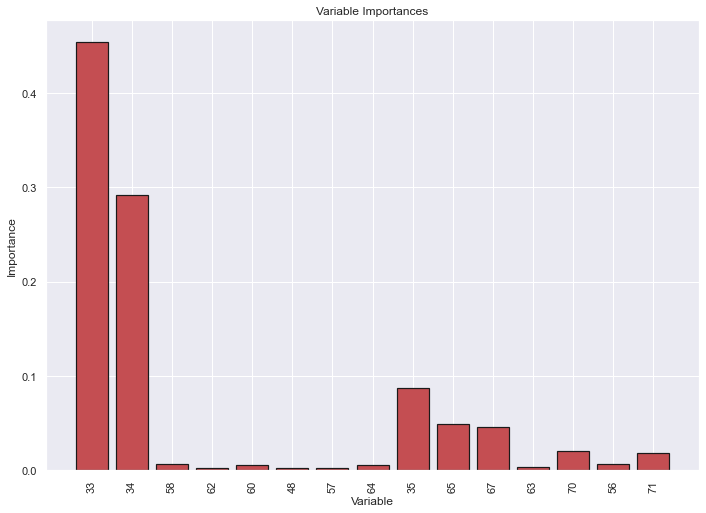

In [94]:
import matplotlib.pyplot as plt 

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


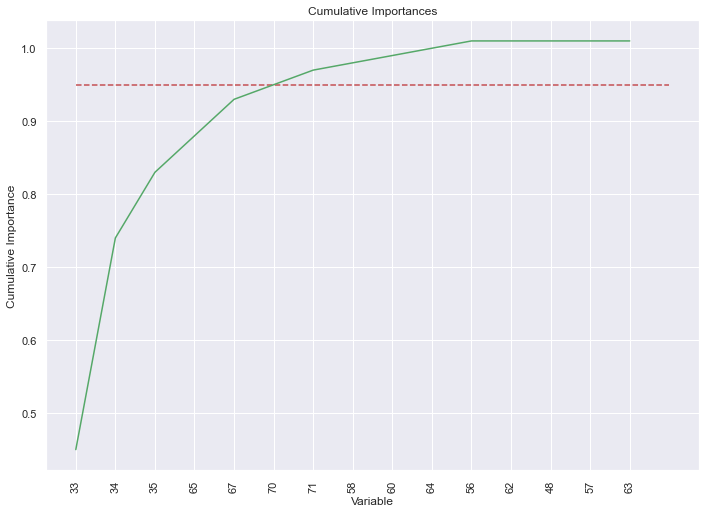

In [95]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


## citation:

reference: 1) https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd  

reference: 2) https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d

reference: 3) https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74